start: 2020/05/05 04:24:42


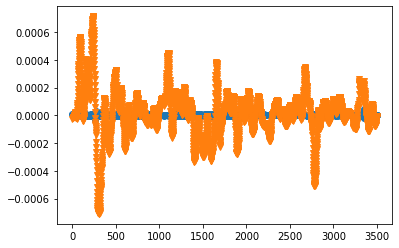

end: 2020/05/05 04:24:45


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime as dt
from mylib import bitcoin
import pickle

def plot(b):
    x = b.data_test[-3500:]
    y = b.model.predict(x)
    y_pred = b.label_test[-3500:]

    plt.plot(list(range(len(x))), y, marker="o")
    plt.plot(list(range(len(x))), y_pred, marker="v")
    plt.show()

def main():
    print('start: ' + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))


    csv = pd.read_csv("datasets/train_v3.csv")
    b = bitcoin.BitcoinRegression()
    b.set_dataset(csv)
    b.set_train_test_dataset(0.8, 0.2)
    
    with open('models/model_v3.pickle', mode="rb") as file:
        b.model = pickle.load(file)

    plot(b)

    
    print('end: ' + str(dt.now().strftime("%Y/%m/%d %H:%M:%S")))

if __name__ == "__main__":
    main()